In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import dataset
df = pd.read_csv("Outlet Dataset.csv")

In [3]:
#first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
#last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [5]:
print("Shape of dataset")
print(df.shape)

Shape of dataset
(5681, 11)


In [6]:
print("Summary of Dataset")
print(df.info())

Summary of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB
None


In [7]:
#standardizing column names
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
)

df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type'],
      dtype='object')

In [8]:
print("Datatypes for Each Column :")
print(df.dtypes)

Datatypes for Each Column :
item_identifier               object
item_weight                  float64
item_fat_content              object
item_visibility              float64
item_type                     object
item_mrp                     float64
outlet_identifier             object
outlet_establishment_year      int64
outlet_size                   object
outlet_location_type          object
outlet_type                   object
dtype: object


In [9]:
print("Descriptive Statistical Analysis of Numerical Columns :")
df.describe()

Descriptive Statistical Analysis of Numerical Columns :


,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
item_identifier                 0
item_weight                   976
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  1606
outlet_location_type            0
outlet_type                     0
dtype: int64


In [11]:
duplicatedrows = df.duplicated().sum()
print("Duplicated Rows Count:")
print(duplicatedrows)

Duplicated Rows Count:
0


In [12]:
cat_cols = df.select_dtypes(include = 'object').columns.tolist()

print("Unique Values For Categorial Colums: ")
for cols in cat_cols :
    print("\n Value Count For {cols} :")
    print(df[cols].value_counts())

Unique Values For Categorial Colums: 

 Value Count For {cols} :
item_identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64

 Value Count For {cols} :
item_fat_content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

 Value Count For {cols} :
item_type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

 Value Count For {cols} :
outlet_identifier
OUT027    624
OUT013    621
OUT049  

In [13]:
#handling Null Values
df['outlet_size'] = df['outlet_size'].fillna('Unknown')

In [14]:
mean_item = df.groupby('item_identifier')['item_weight'].mean()
print(mean_item)

item_identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: item_weight, Length: 1543, dtype: float64


In [15]:
df['item_weight'] = df['item_weight'].fillna(df.groupby('item_identifier')['item_weight'].transform('mean'))

In [16]:
df['item_weight'] = df['item_weight'].fillna(df['item_weight'].mean())

In [17]:
df.isnull().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
dtype: int64

In [18]:
df['item_weight'] = df['item_weight'].round(3)
df['item_mrp'] =  df['item_mrp'].round(2)

In [19]:
df['item_fat_content'] = df['item_fat_content'].replace("LF", "Low Fat")
df['item_fat_content'] = df['item_fat_content'].replace("reg", "Regular")

In [20]:
df.to_csv("Cleaned_outlet.csv", index = False)

In [21]:
avg_mrp = df.groupby("item_type")["item_mrp"].mean().sort_values()

print(avg_mrp)

item_type
Baking Goods             129.052146
Breakfast                132.481711
Frozen Foods             133.410193
Others                   135.105495
Health and Hygiene       136.629379
Canned                   136.915678
Hard Drinks              137.608986
Seafood                  139.874000
Meat                     140.849743
Soft Drinks              141.597544
Breads                   142.055576
Fruits and Vegetables    143.867362
Dairy                    145.325881
Snack Foods              146.863904
Household                147.755047
Starchy Foods            152.092397
Name: item_mrp, dtype: float64


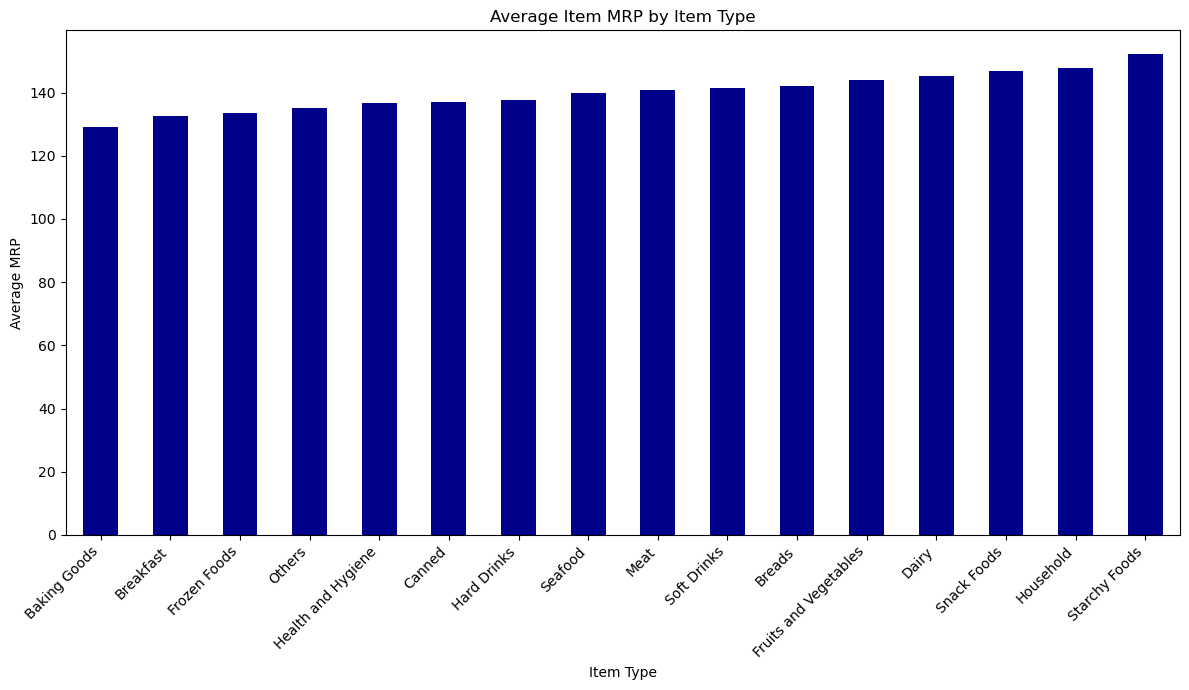

In [22]:
#Item Type vs Average Mrp
plt.figure(figsize = (12,7))
avg_mrp.plot(kind="bar", color = "DarkBlue")
plt.title("Average Item MRP by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Average MRP")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
outlet_counts = df["outlet_type"].value_counts()
print(outlet_counts)

outlet_type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


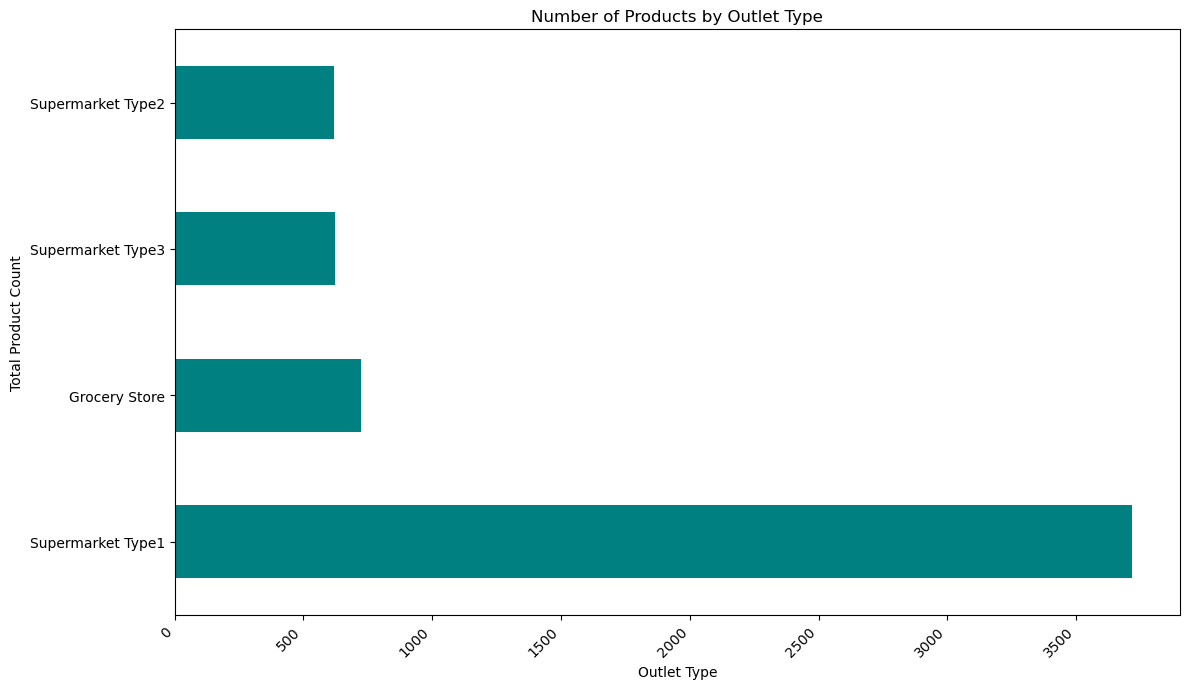

In [27]:
#Products by Outlet Type
plt.figure(figsize = (12,7))
outlet_counts.plot(kind="barh", color = "teal")
plt.title("Number of Products by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Total Product Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
outlet_sales = avg_mrp = df.groupby("outlet_type")["item_mrp"].sum()

print(outlet_sales)

outlet_type
Grocery Store        102495.82
Supermarket Type1    523024.22
Supermarket Type2     86509.59
Supermarket Type3     89123.60
Name: item_mrp, dtype: float64


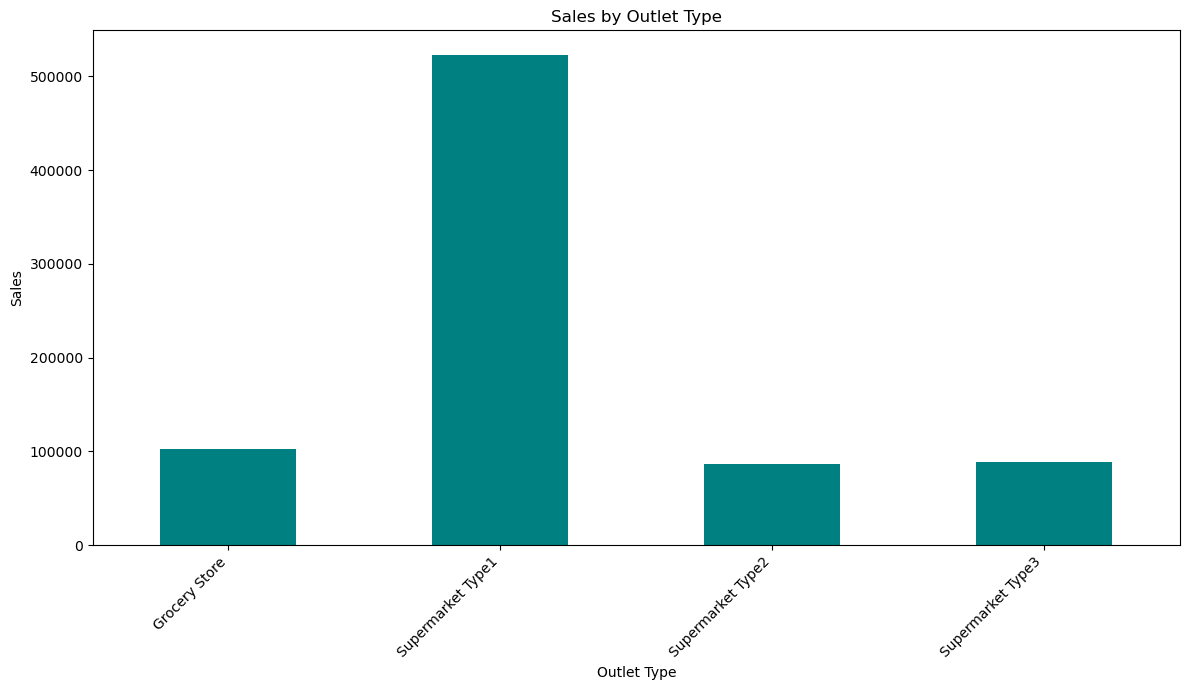

In [26]:
plt.figure(figsize = (12,7))
outlet_sales.plot(kind="bar", color = "Teal")
plt.title("Sales by Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

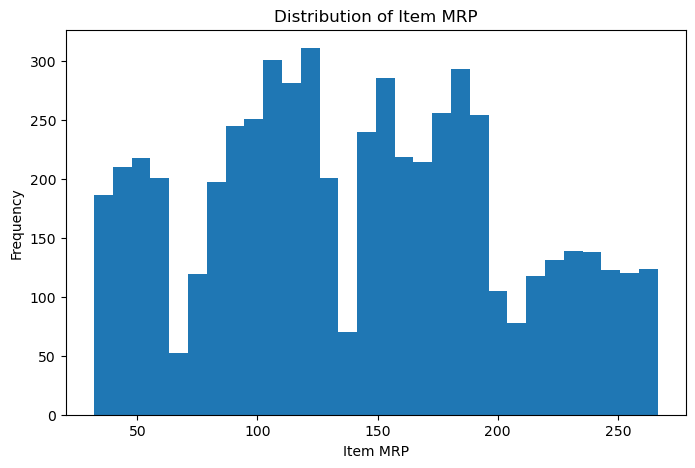

In [28]:
# Distribution of Item MRP
plt.figure(figsize=(8,5))
plt.hist(df["item_mrp"], bins=30)
plt.title("Distribution of Item MRP")
plt.xlabel("Item MRP")
plt.ylabel("Frequency")
plt.show()

In [29]:
tier_sales = avg_mrp = df.groupby("outlet_location_type")["item_mrp"].sum()
print(tier_sales)

outlet_location_type
Tier 1    224541.34
Tier 2    261173.99
Tier 3    315437.90
Name: item_mrp, dtype: float64


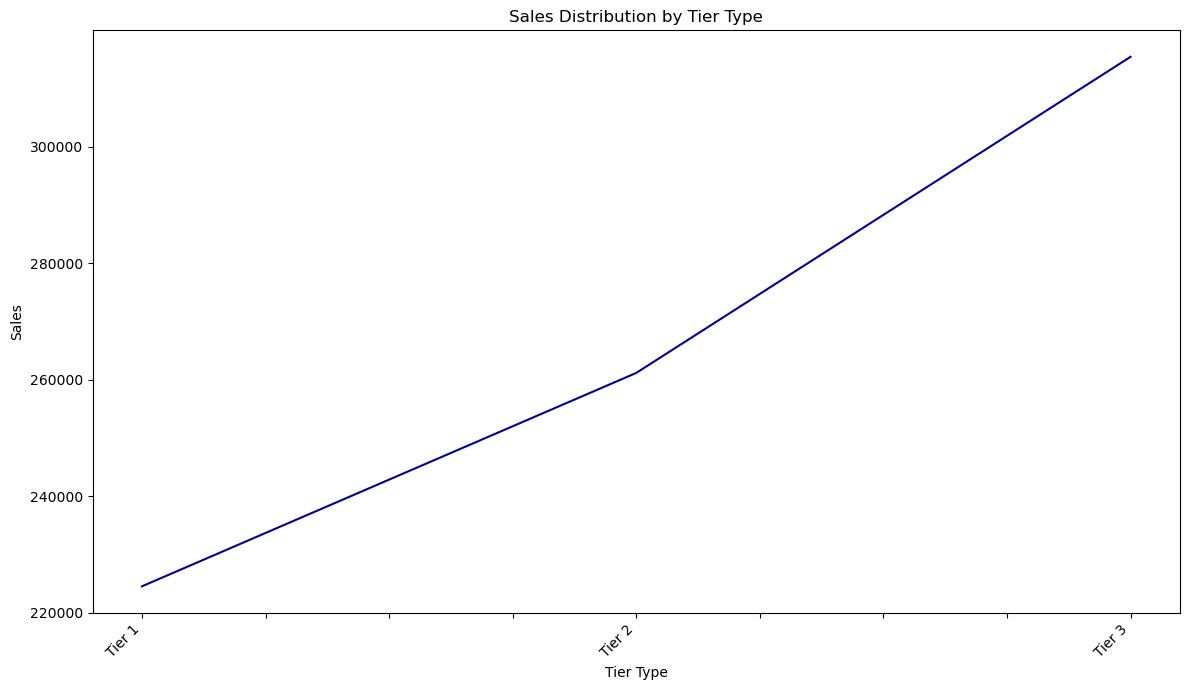

In [30]:
plt.figure(figsize = (12,7))
tier_sales.plot(kind="line", color = "DarkBlue")
plt.title("Sales Distribution by Tier Type")
plt.xlabel("Tier Type")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
item_counts = df["item_type"].value_counts()
print(item_counts)

item_type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64


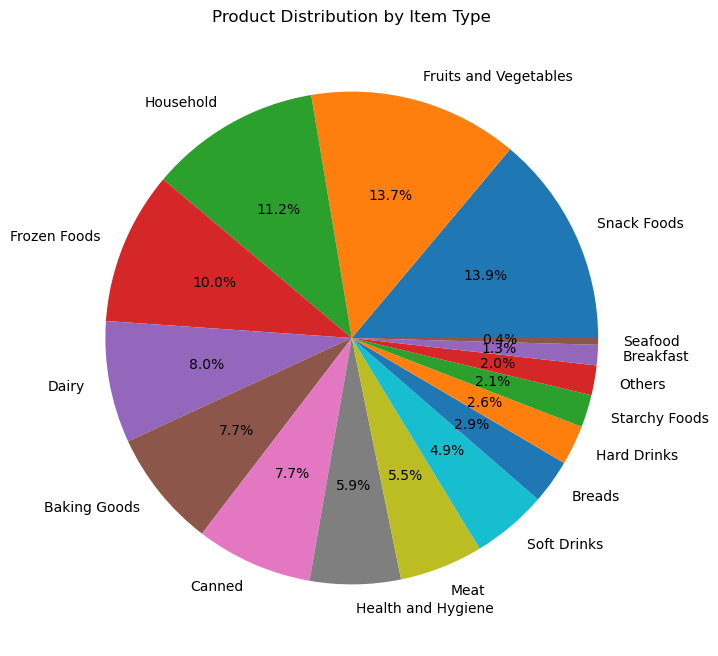

In [32]:
plt.figure(figsize=(10,8))
plt.pie(item_counts, labels=item_counts.index, autopct="%1.1f%%")
plt.title("Product Distribution by Item Type")
plt.show()